1 Import Bibliotek

In [4]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2 lista kodów prodóktów o których zostało pobrane opinie

In [5]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

84514582


#wczytanie opinii o wskazanym produkcie

In [6]:
product_id = input("Podaj kod produktu z Ceneo.pl: ")
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",",".")).astype(float)

In [7]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()
average_rating

4.377906976744186

historia ocen prodóktów

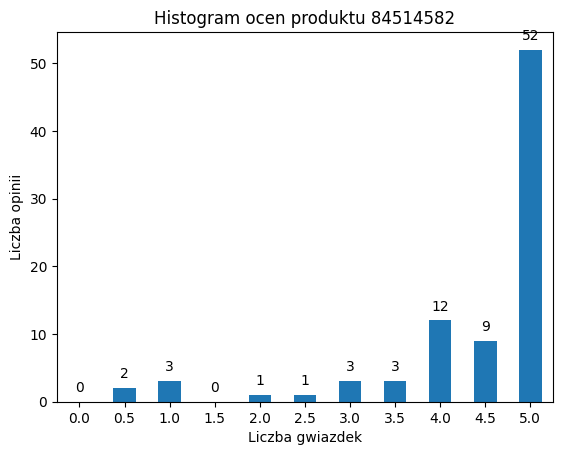

In [8]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
rating_distribution.plot.bar()
plt.title(f"Histogram ocen produktu {product_id}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
for index, value in enumerate(rating_distribution):
    plt.text(index, value+1.5, str(value), ha="center")

wykres udziału rekomendacji

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o produkcie 84514582')

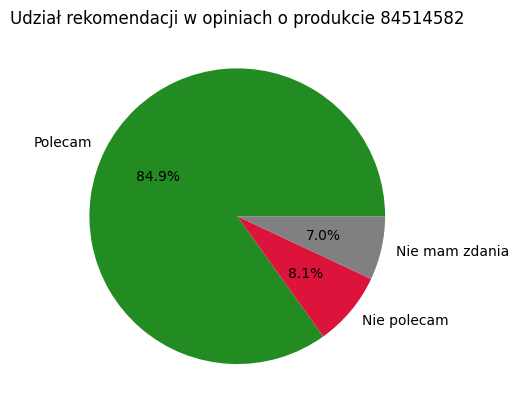

In [9]:
recommendation_distributions = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None], fill_value=0)
recommendation_distributions.plot.pie(
    label = "",
    autopct = lambda r: f"{r:1.1f}%" if r>0 else "",
    labels = ["Polecam", "Nie polecam", "Nie mam zdania"],
    colors = ["forestgreen", "crimson", "grey"]
)
plt.title(f"Udział rekomendacji w opiniach o produkcie {product_id}")


In [10]:
stats = {
    "product_id": product_id,
    "opinions_count": opinions_count,
    "pros_count": int(pros_count),
    "cons_count": int(cons_count),
    "average_rating": average_rating,
    "rating_distribution": rating_distribution.to_dict(),
    "recommendation_distributions": recommendation_distributions.to_dict()
}

In [11]:
if not os.path.exists("stats"):
    os.mkdir("stats")
with open(f"stats/{product_id}.json", "w", encoding="UTF-8") as jf:
    json.dump(stats, jf, indent=4, ensure_ascii=False)